# Regression_banking_performance

# Import library 

In [56]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Data Read 

In [57]:
df=pd.read_csv("D:/DS NOTE/My external project/Comprehensive Banking Analytics/regression/bank_dataset.csv")
df

,Bank Name,State,Date,Asset Growth (%),Revenue (Million INR),Profitability (%),Interest Rate (%),Inflation Rate (%),GDP Growth (%),Stock Market Index,Loan Portfolio (Million INR),Cost of Funds (%),Regulatory Changes (Binary),Demographic Trends,Geopolitical Events (Binary)
0,State Bank of India,Gujarat,2022-01-01,7.880195,2781.811992,17.331954,7.514691,3.910157,5.086880,54419.055873,6788.682293,5.036842,1,Positive,0
1,State Bank of India,Punjab,2022-01-02,4.955709,3188.952670,15.018504,6.084211,5.345673,6.479171,52395.632481,6002.568851,5.270031,0,Negative,1
2,State Bank of India,Manipur,2022-01-03,3.972510,2993.533718,14.696098,7.579384,5.297576,6.104497,45866.197609,6240.318517,3.943054,0,Negative,1
3,State Bank of India,Karnataka,2022-01-04,5.800405,3975.571040,15.515189,6.220414,5.074967,5.378031,51691.541555,7069.109090,4.427096,0,Negative,0
4,State Bank of India,Haryana,2022-01-05,3.440874,2272.879505,15.748703,5.984699,5.896917,4.165305,49103.037219,7350.259772,4.440648,0,Neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,State Bank of India,Mizoram,2024-09-22,2.141832,3957.962230,13.170999,6.232048,4.950561,6.760114,50807.968299,7355.222364,4.935874,0,Positive,0
996,State Bank of India,West Bengal,2024-09-23,5.851829,3206.986192,14.936355,5.629071,5.947448,4.812051,52143.875620,6345.640103,4.985643,0,Positive,1
997,State Bank of India,Punjab,2024-09-24,5.642564,2715.628168,16.449849,7.929683,5.735456,5.111474,54166.431027,6689.011787,3.601708,1,Neutral,0
998,State Bank of India,Telangana,2024-09-25,5.280184,3295.634892,14.955414,6.936808,4.317392,5.706764,52054.966519,6123.086068,3.942247,1,Positive,1


In [58]:
# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Bank Name                     1000 non-null   object 
 1   State                         1000 non-null   object 
 2   Date                          1000 non-null   object 
 3   Asset Growth (%)              1000 non-null   float64
 4   Revenue (Million INR)         1000 non-null   float64
 5   Profitability (%)             1000 non-null   float64
 6   Interest Rate (%)             1000 non-null   float64
 7   Inflation Rate (%)            1000 non-null   float64
 8   GDP Growth (%)                1000 non-null   float64
 9   Stock Market Index            1000 non-null   float64
 10  Loan Portfolio (Million INR)  1000 non-null   float64
 11  Cost of Funds (%)             1000 non-null   float64
 12  Regulatory Changes (Binary)   1000 non-null   int64  
 13  Demo

# Data preprocessing 

In [59]:
df.head()

,Bank Name,State,Date,Asset Growth (%),Revenue (Million INR),Profitability (%),Interest Rate (%),Inflation Rate (%),GDP Growth (%),Stock Market Index,Loan Portfolio (Million INR),Cost of Funds (%),Regulatory Changes (Binary),Demographic Trends,Geopolitical Events (Binary)
0,State Bank of India,Gujarat,2022-01-01,7.880195,2781.811992,17.331954,7.514691,3.910157,5.086880,54419.055873,6788.682293,5.036842,1,Positive,0
1,State Bank of India,Punjab,2022-01-02,4.955709,3188.952670,15.018504,6.084211,5.345673,6.479171,52395.632481,6002.568851,5.270031,0,Negative,1
2,State Bank of India,Manipur,2022-01-03,3.972510,2993.533718,14.696098,7.579384,5.297576,6.104497,45866.197609,6240.318517,3.943054,0,Negative,1
3,State Bank of India,Karnataka,2022-01-04,5.800405,3975.571040,15.515189,6.220414,5.074967,5.378031,51691.541555,7069.109090,4.427096,0,Negative,0
4,State Bank of India,Haryana,2022-01-05,3.440874,2272.879505,15.748703,5.984699,5.896917,4.165305,49103.037219,7350.259772,4.440648,0,Neutral,0


In [60]:
df.tail()

,Bank Name,State,Date,Asset Growth (%),Revenue (Million INR),Profitability (%),Interest Rate (%),Inflation Rate (%),GDP Growth (%),Stock Market Index,Loan Portfolio (Million INR),Cost of Funds (%),Regulatory Changes (Binary),Demographic Trends,Geopolitical Events (Binary)
995,State Bank of India,Mizoram,2024-09-22,2.141832,3957.962230,13.170999,6.232048,4.950561,6.760114,50807.968299,7355.222364,4.935874,0,Positive,0
996,State Bank of India,West Bengal,2024-09-23,5.851829,3206.986192,14.936355,5.629071,5.947448,4.812051,52143.875620,6345.640103,4.985643,0,Positive,1
997,State Bank of India,Punjab,2024-09-24,5.642564,2715.628168,16.449849,7.929683,5.735456,5.111474,54166.431027,6689.011787,3.601708,1,Neutral,0
998,State Bank of India,Telangana,2024-09-25,5.280184,3295.634892,14.955414,6.936808,4.317392,5.706764,52054.966519,6123.086068,3.942247,1,Positive,1
999,State Bank of India,Chhattisgarh,2024-09-26,3.391683,2245.841357,14.899085,7.803632,3.119844,6.645127,51717.792703,6539.947274,4.048524,1,Positive,0


# Rename the columns

In [61]:
columns_to_rename = {
    'Asset Growth (%)': 'Asset Growth',
    'Revenue (Million INR)': 'Revenue',
    'Profitability (%)': 'Profitability',
    'Interest Rate (%)': 'Interest Rate',
    'Inflation Rate (%)': 'Inflation Rate',
    'GDP Growth (%)': 'GDP Growth',
    'Stock Market Index': 'Stock Market Index',
    'Loan Portfolio (Million INR)': 'Loan Portfolio',
    'Cost of Funds (%)': 'Cost of Funds'
}

df.rename(columns=columns_to_rename, inplace=True)


# Detect missing values

In [62]:
df.isna().sum()

Bank Name                       0
State                           0
Date                            0
Asset Growth                    0
Revenue                         0
Profitability                   0
Interest Rate                   0
Inflation Rate                  0
GDP Growth                      0
Stock Market Index              0
Loan Portfolio                  0
Cost of Funds                   0
Regulatory Changes (Binary)     0
Demographic Trends              0
Geopolitical Events (Binary)    0
dtype: int64

# Return boolean Series denoting duplicate rows.

In [63]:
df.duplicated().sum()

0

# Convert argument to datetime

- Converting the date data to integers (day, month, year) facilitates temporal analysis. It enhances visualization and usability, enabling better exploration of trends and patterns over time in the dataset. This format is more compatible with visualizations and supports efficient time-oriented analyses.

In [64]:
df['Date'] = pd.to_datetime(df['Date'])


In [65]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Drop the orginal colum

In [66]:
df1=df.drop('Date',axis=1).copy()


# Histogram`_ is a representation of the distribution of data.

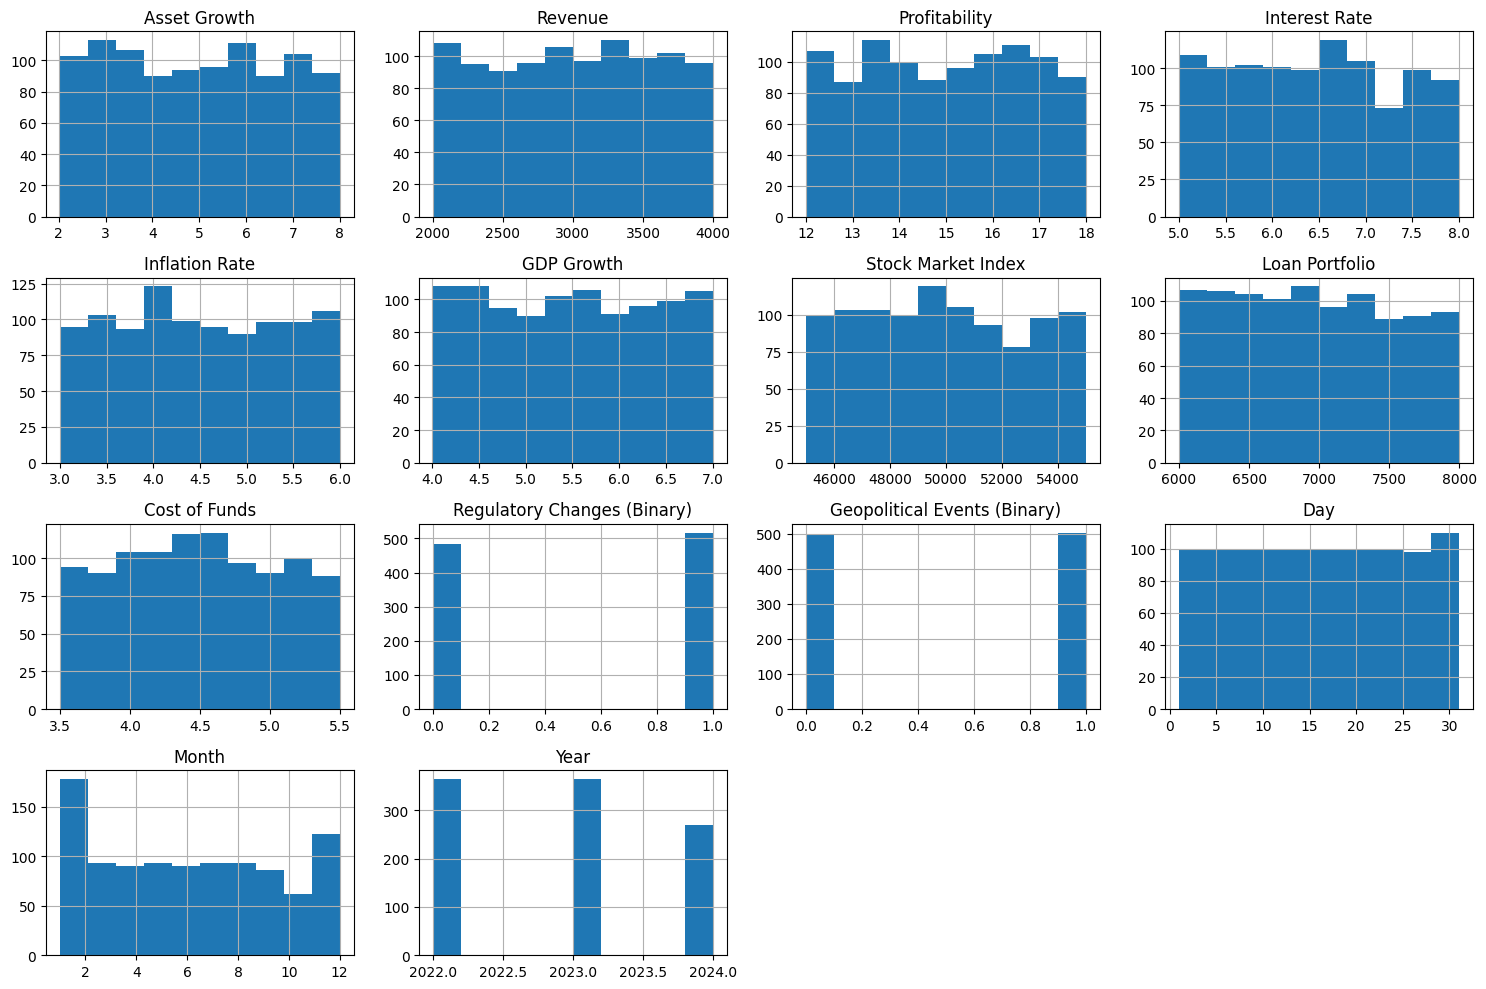

In [67]:
df1.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Outlier denoting 

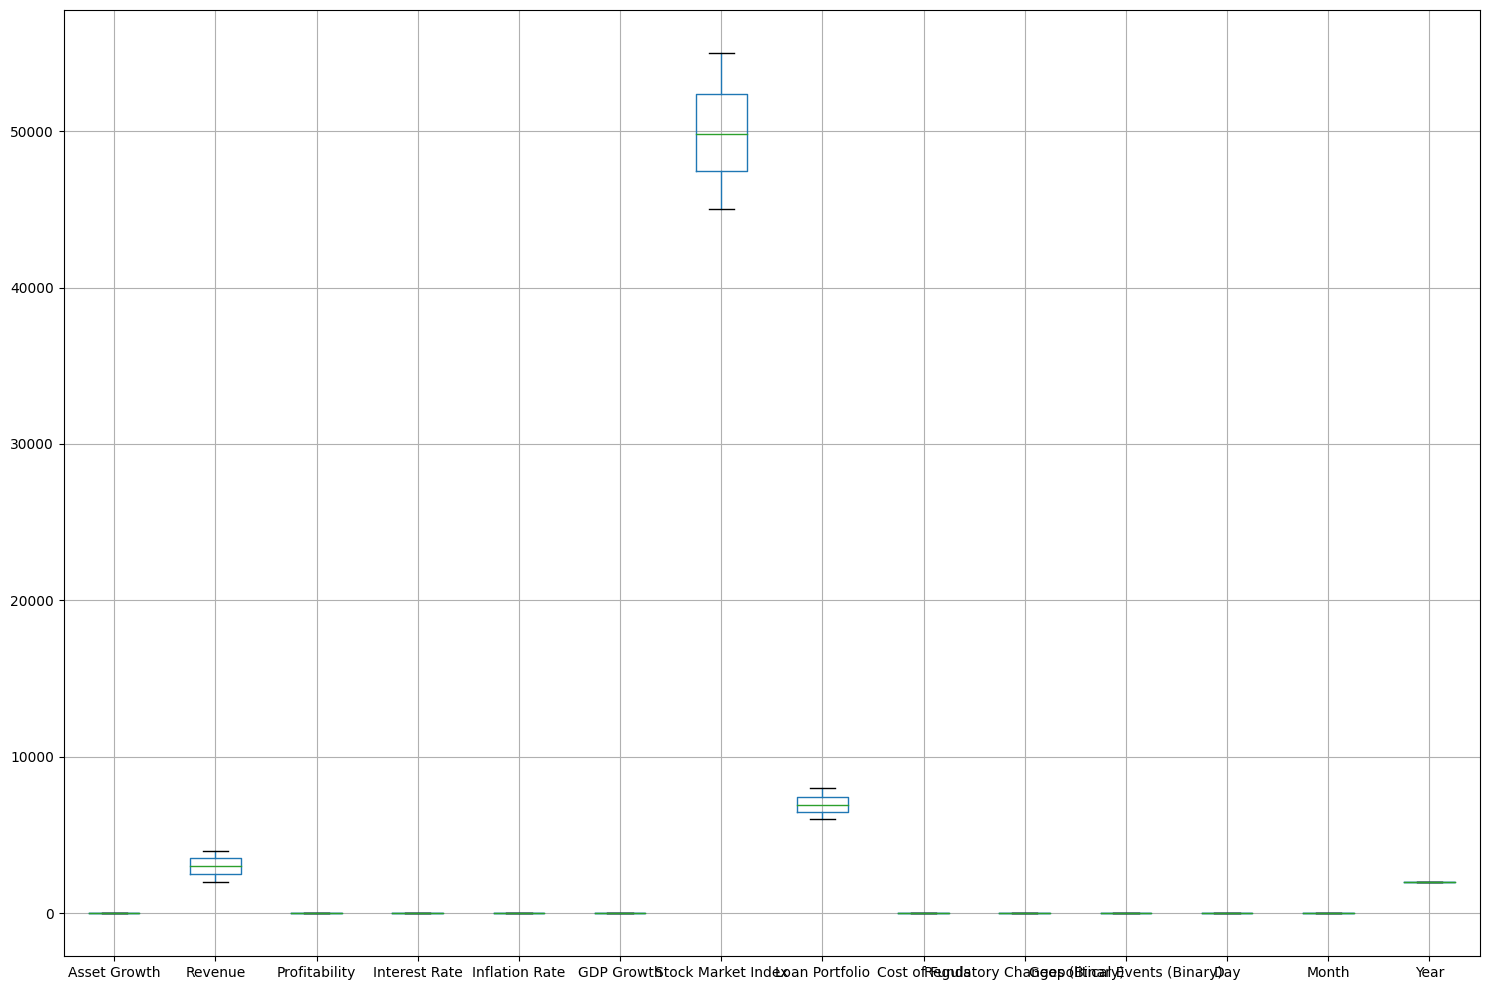

In [68]:
df1.boxplot(figsize=(15, 10))
plt.tight_layout()
plt.show()

- The absence of outliers in the data suggests that extreme values or anomalies, which could skew the distribution, are not present. This contributes to a more robust and representative analysis, as the statistical measures and visualizations are not significantly impacted by unusual data points. The overall distribution can be considered reliable for drawing insights and making data-driven decisions.

# Generate descriptive statistics

In [69]:
df1.describe(include='object')

,Bank Name,State,Demographic Trends
count,1000,1000,1000
unique,1,28,3
top,State Bank of India,West Bengal,Neutral
freq,1000,54,348


# Data Visualization 

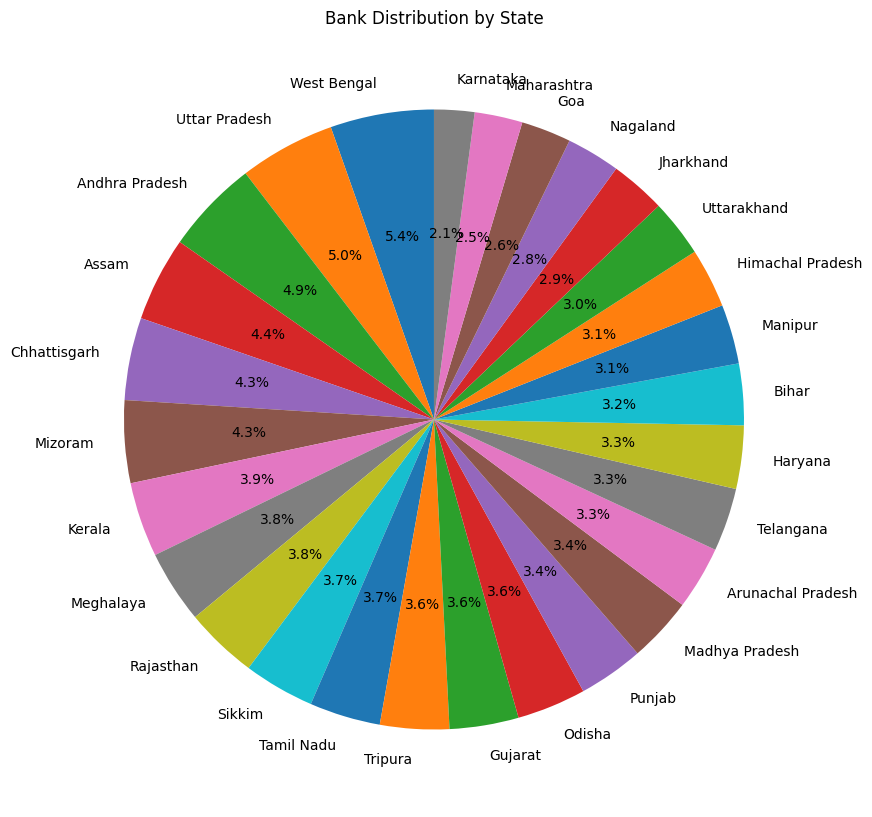

In [70]:
# Pie Chart for Bank Distribution by State
state_counts = df1['State'].value_counts()
plt.figure(figsize=(10,15))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Bank Distribution by State')
plt.show()


**Geographical Distribution** Identify states with larger or smaller shares of banks. A larger slice indicates a higher concentration of banks in that state.

**Regional Disparities** Check for regional patterns in the distribution. Are banks more concentrated in specific regions or spread evenly across the country?

**Market Presence** States with a larger share may represent significant markets or economic hubs, while those with smaller shares may have fewer banking institutions.

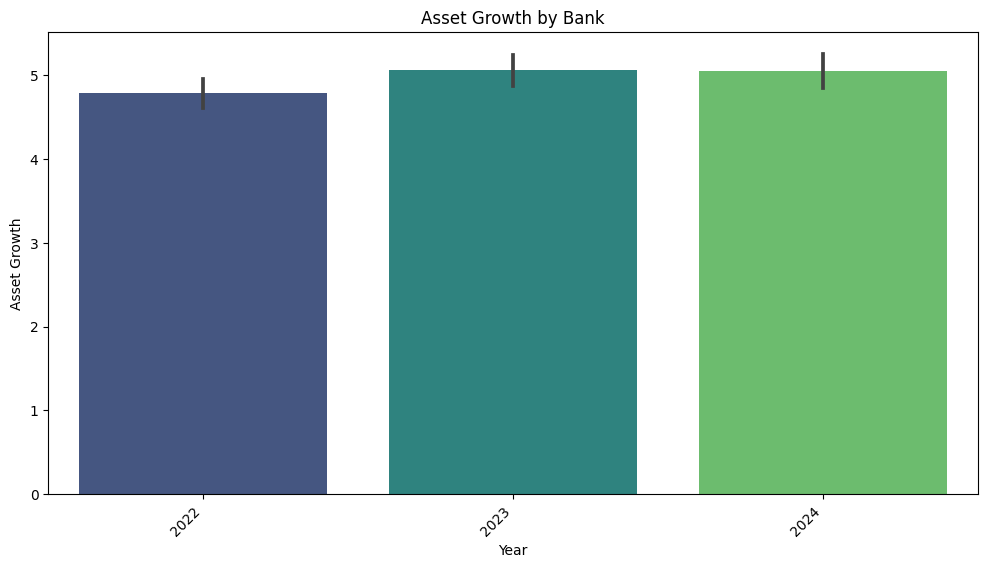

In [71]:
# Bar Chart for Asset Growth by Bank
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Asset Growth', data=df1, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Asset Growth by Bank')
plt.show()

- The "Asset Growth by Bank" bar chart visually presents the annual performance of banks, helping clients identify top-performing banks, assess stability or volatility, recognize yearly trends, and make informed decisions based on the observed patterns in asset growth.

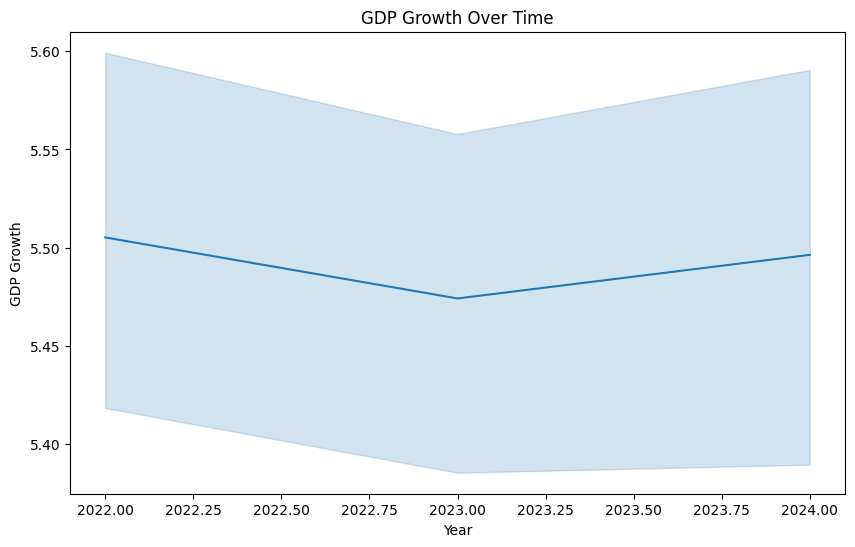

In [72]:
# 4. Line Chart for GDP Growth Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='GDP Growth', data=df1)
plt.title('GDP Growth Over Time')
plt.show()


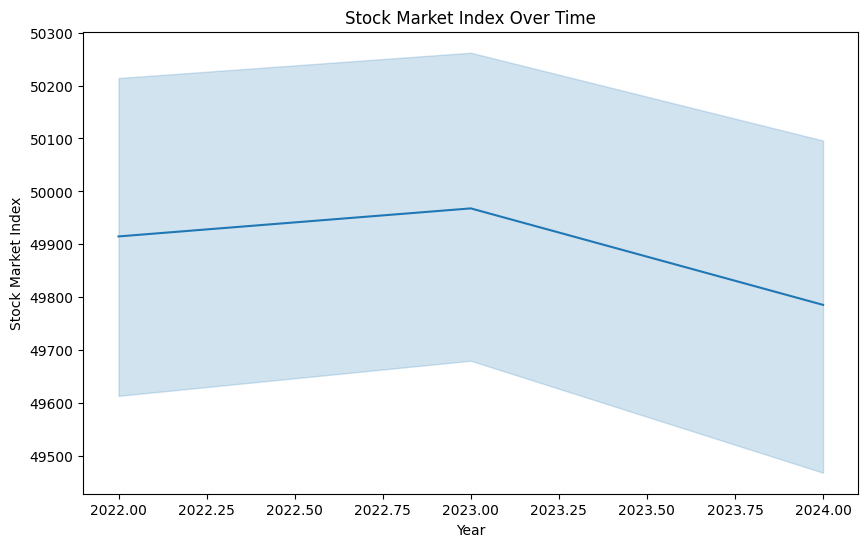

In [73]:
# 7. Line Chart for Stock Market Index Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Stock Market Index', data=df1)
plt.title('Stock Market Index Over Time')
plt.show()



<Figure size 1200x600 with 0 Axes>

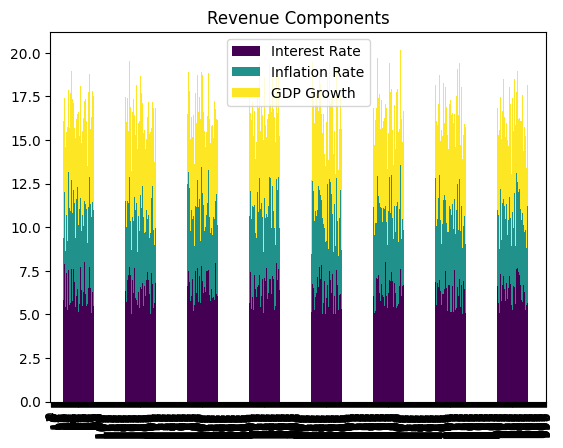

In [74]:
# Stacked Bar Chart for Revenue Components
revenue_components = df1[['Interest Rate', 'Inflation Rate', 'GDP Growth']]
plt.figure(figsize=(12, 6))
revenue_components.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Revenue Components')
plt.show()

# Feature engineering 

**Extract informatiom**
- from the 'Day', 'Month', and 'Year' columns to create new features like 'Day of Week', 'Quarter', or 'Season'. This can help the model capture any patterns related to the timing of the data.

In [75]:
df1['Date'] = pd.to_datetime(df1[['Year', 'Month', 'Day']])
df1['Day_of_Week'] = df1['Date'].dt.dayofweek
df1['Quarter'] = df1['Date'].dt.quarter
df1['Season'] = df1['Date'].dt.month % 12 // 3 + 1
df1=df1.drop('Date',axis=1)

**Create interaction features between pairs of numerical features. This can help the model capture relationships that may not be evident with individual features alone**
- The purpose of this operation is to create a new feature that represents the ratio of revenue to asset growth, which might capture the efficiency or performance of the financial aspect of the data
- The intent here is to create a feature that represents the GDP per capita, assuming 'Population' represents the population of the corresponding region. This could be an indicator of the economic well-being of the population.

In [76]:
df1['Revenue_Asset_Ratio'] = df1['Revenue'] / df1['Asset Growth']
df1['GDP_Per_Capita'] = df1['GDP Growth'] / df1['Loan Portfolio']

**Ratio Features**

- Create ratios between relevant numerical features. For example, you can create a ratio of 'Loan Portfolio' to 'Cost of Funds' to represent the efficiency of fund utilization.

In [77]:
df1['Loan_to_Cost_Ratio'] = df1['Loan Portfolio'] / df1['Cost of Funds']

**Compute statistical aggregations**

like mean, median, or standard deviation for numerical features within each category. For example, calculate the average 'Profitability' for each 'State'.

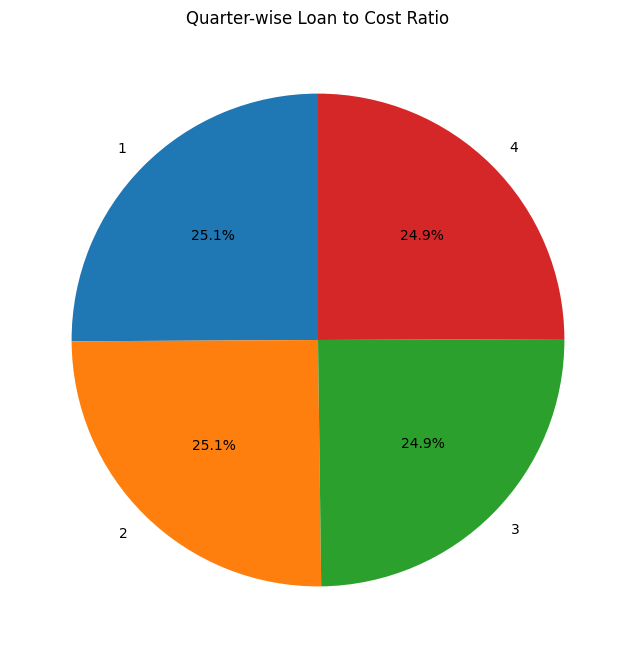

In [78]:
# 6. Pie Chart for Quarter-wise Loan to Cost Ratio
loan_cost_ratio_by_quarter = df1.groupby('Quarter')['Loan_to_Cost_Ratio'].mean()
plt.figure(figsize=(8, 8))
plt.pie(loan_cost_ratio_by_quarter, labels=loan_cost_ratio_by_quarter.index, autopct='%1.1f%%', startangle=90)
plt.title('Quarter-wise Loan to Cost Ratio')
plt.show()



In [79]:
state_profitability_mean = df1.groupby('State')['Profitability'].mean().reset_index()
state_profitability_mean.columns = ['State', 'Avg_Profitability']
df1 = pd.merge(df1, state_profitability_mean, on='State', how='left')


In [80]:
df1

,Bank Name,State,Asset Growth,Revenue,Profitability,Interest Rate,Inflation Rate,GDP Growth,Stock Market Index,Loan Portfolio,...,Day,Month,Year,Day_of_Week,Quarter,Season,Revenue_Asset_Ratio,GDP_Per_Capita,Loan_to_Cost_Ratio,Avg_Profitability
0,State Bank of India,Gujarat,7.880195,2781.811992,17.331954,7.514691,3.910157,5.086880,54419.055873,6788.682293,...,1,1,2022,5,1,1,353.013070,0.000749,1347.805252,15.284725
1,State Bank of India,Punjab,4.955709,3188.952670,15.018504,6.084211,5.345673,6.479171,52395.632481,6002.568851,...,2,1,2022,6,1,1,643.490760,0.001079,1139.000748,15.108692
2,State Bank of India,Manipur,3.972510,2993.533718,14.696098,7.579384,5.297576,6.104497,45866.197609,6240.318517,...,3,1,2022,0,1,1,753.562350,0.000978,1582.610341,14.273667
3,State Bank of India,Karnataka,5.800405,3975.571040,15.515189,6.220414,5.074967,5.378031,51691.541555,7069.109090,...,4,1,2022,1,1,1,685.395408,0.000761,1596.782542,14.945320
4,State Bank of India,Haryana,3.440874,2272.879505,15.748703,5.984699,5.896917,4.165305,49103.037219,7350.259772,...,5,1,2022,2,1,1,660.553015,0.000567,1655.222304,15.351610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,State Bank of India,Mizoram,2.141832,3957.962230,13.170999,6.232048,4.950561,6.760114,50807.968299,7355.222364,...,22,9,2024,6,3,4,1847.933509,0.000919,1490.156008,15.325650
996,State Bank of India,West Bengal,5.851829,3206.986192,14.936355,5.629071,5.947448,4.812051,52143.875620,6345.640103,...,23,9,2024,0,3,4,548.031426,0.000758,1272.782688,15.115745
997,State Bank of India,Punjab,5.642564,2715.628168,16.449849,7.929683,5.735456,5.111474,54166.431027,6689.011787,...,24,9,2024,1,3,4,481.275545,0.000764,1857.177734,15.108692
998,State Bank of India,Telangana,5.280184,3295.634892,14.955414,6.936808,4.317392,5.706764,52054.966519,6123.086068,...,25,9,2024,2,3,4,624.151468,0.000932,1553.197150,15.277279


# Feature encoding 

In [81]:
df1.columns 

Index(['Bank Name', 'State', 'Asset Growth', 'Revenue', 'Profitability',
       'Interest Rate', 'Inflation Rate', 'GDP Growth', 'Stock Market Index',
       'Loan Portfolio', 'Cost of Funds', 'Regulatory Changes (Binary)',
       'Demographic Trends', 'Geopolitical Events (Binary)', 'Day', 'Month',
       'Year', 'Day_of_Week', 'Quarter', 'Season', 'Revenue_Asset_Ratio',
       'GDP_Per_Capita', 'Loan_to_Cost_Ratio', 'Avg_Profitability'],
      dtype='object')

In [82]:
df1[['Demographic Trends','Bank Name']].value_counts()

Demographic Trends  Bank Name          
Neutral             State Bank of India    348
Positive            State Bank of India    328
Negative            State Bank of India    324
Name: count, dtype: int64

# Map or Replace / Cat to Num

In [83]:
df1[['Demographic Trends','Bank Name']] = df1[['Demographic Trends',
                                               'Bank Name']].apply(lambda x: x.map({'Neutral':0,'Positive':1,
                                                                                    'Negative':3,'State Bank of India':1}))
df1[['Demographic Trends','Bank Name']] 

,Demographic Trends,Bank Name
0,1,1
1,3,1
2,3,1
3,3,1
4,0,1
...,...,...
995,1,1
996,1,1
997,0,1
998,1,1


In [84]:
df1

,Bank Name,State,Asset Growth,Revenue,Profitability,Interest Rate,Inflation Rate,GDP Growth,Stock Market Index,Loan Portfolio,...,Day,Month,Year,Day_of_Week,Quarter,Season,Revenue_Asset_Ratio,GDP_Per_Capita,Loan_to_Cost_Ratio,Avg_Profitability
0,1,Gujarat,7.880195,2781.811992,17.331954,7.514691,3.910157,5.086880,54419.055873,6788.682293,...,1,1,2022,5,1,1,353.013070,0.000749,1347.805252,15.284725
1,1,Punjab,4.955709,3188.952670,15.018504,6.084211,5.345673,6.479171,52395.632481,6002.568851,...,2,1,2022,6,1,1,643.490760,0.001079,1139.000748,15.108692
2,1,Manipur,3.972510,2993.533718,14.696098,7.579384,5.297576,6.104497,45866.197609,6240.318517,...,3,1,2022,0,1,1,753.562350,0.000978,1582.610341,14.273667
3,1,Karnataka,5.800405,3975.571040,15.515189,6.220414,5.074967,5.378031,51691.541555,7069.109090,...,4,1,2022,1,1,1,685.395408,0.000761,1596.782542,14.945320
4,1,Haryana,3.440874,2272.879505,15.748703,5.984699,5.896917,4.165305,49103.037219,7350.259772,...,5,1,2022,2,1,1,660.553015,0.000567,1655.222304,15.351610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,Mizoram,2.141832,3957.962230,13.170999,6.232048,4.950561,6.760114,50807.968299,7355.222364,...,22,9,2024,6,3,4,1847.933509,0.000919,1490.156008,15.325650
996,1,West Bengal,5.851829,3206.986192,14.936355,5.629071,5.947448,4.812051,52143.875620,6345.640103,...,23,9,2024,0,3,4,548.031426,0.000758,1272.782688,15.115745
997,1,Punjab,5.642564,2715.628168,16.449849,7.929683,5.735456,5.111474,54166.431027,6689.011787,...,24,9,2024,1,3,4,481.275545,0.000764,1857.177734,15.108692
998,1,Telangana,5.280184,3295.634892,14.955414,6.936808,4.317392,5.706764,52054.966519,6123.086068,...,25,9,2024,2,3,4,624.151468,0.000932,1553.197150,15.277279


In [85]:
df1.columns

Index(['Bank Name', 'State', 'Asset Growth', 'Revenue', 'Profitability',
       'Interest Rate', 'Inflation Rate', 'GDP Growth', 'Stock Market Index',
       'Loan Portfolio', 'Cost of Funds', 'Regulatory Changes (Binary)',
       'Demographic Trends', 'Geopolitical Events (Binary)', 'Day', 'Month',
       'Year', 'Day_of_Week', 'Quarter', 'Season', 'Revenue_Asset_Ratio',
       'GDP_Per_Capita', 'Loan_to_Cost_Ratio', 'Avg_Profitability'],
      dtype='object')

# LabelEncoding 

In [86]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df1['State_LabelEncoded'] = label_encoder.fit_transform(df1['State'])


# Concatenate pandas objects along a particular axis

In [87]:
df2= pd.concat([df1, df1['State_LabelEncoded']], axis=1)

In [88]:
df2.duplicated().sum()

0

In [89]:
df2=df2.drop('State',axis=1)

In [90]:
df2

,Bank Name,Asset Growth,Revenue,Profitability,Interest Rate,Inflation Rate,GDP Growth,Stock Market Index,Loan Portfolio,Cost of Funds,...,Year,Day_of_Week,Quarter,Season,Revenue_Asset_Ratio,GDP_Per_Capita,Loan_to_Cost_Ratio,Avg_Profitability,State_LabelEncoded,State_LabelEncoded
0,1,7.880195,2781.811992,17.331954,7.514691,3.910157,5.086880,54419.055873,6788.682293,5.036842,...,2022,5,1,1,353.013070,0.000749,1347.805252,15.284725,6,6
1,1,4.955709,3188.952670,15.018504,6.084211,5.345673,6.479171,52395.632481,6002.568851,5.270031,...,2022,6,1,1,643.490760,0.001079,1139.000748,15.108692,19,19
2,1,3.972510,2993.533718,14.696098,7.579384,5.297576,6.104497,45866.197609,6240.318517,3.943054,...,2022,0,1,1,753.562350,0.000978,1582.610341,14.273667,14,14
3,1,5.800405,3975.571040,15.515189,6.220414,5.074967,5.378031,51691.541555,7069.109090,4.427096,...,2022,1,1,1,685.395408,0.000761,1596.782542,14.945320,10,10
4,1,3.440874,2272.879505,15.748703,5.984699,5.896917,4.165305,49103.037219,7350.259772,4.440648,...,2022,2,1,1,660.553015,0.000567,1655.222304,15.351610,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2.141832,3957.962230,13.170999,6.232048,4.950561,6.760114,50807.968299,7355.222364,4.935874,...,2024,6,3,4,1847.933509,0.000919,1490.156008,15.325650,16,16
996,1,5.851829,3206.986192,14.936355,5.629071,5.947448,4.812051,52143.875620,6345.640103,4.985643,...,2024,0,3,4,548.031426,0.000758,1272.782688,15.115745,27,27
997,1,5.642564,2715.628168,16.449849,7.929683,5.735456,5.111474,54166.431027,6689.011787,3.601708,...,2024,1,3,4,481.275545,0.000764,1857.177734,15.108692,19,19
998,1,5.280184,3295.634892,14.955414,6.936808,4.317392,5.706764,52054.966519,6123.086068,3.942247,...,2024,2,3,4,624.151468,0.000932,1553.197150,15.277279,23,23


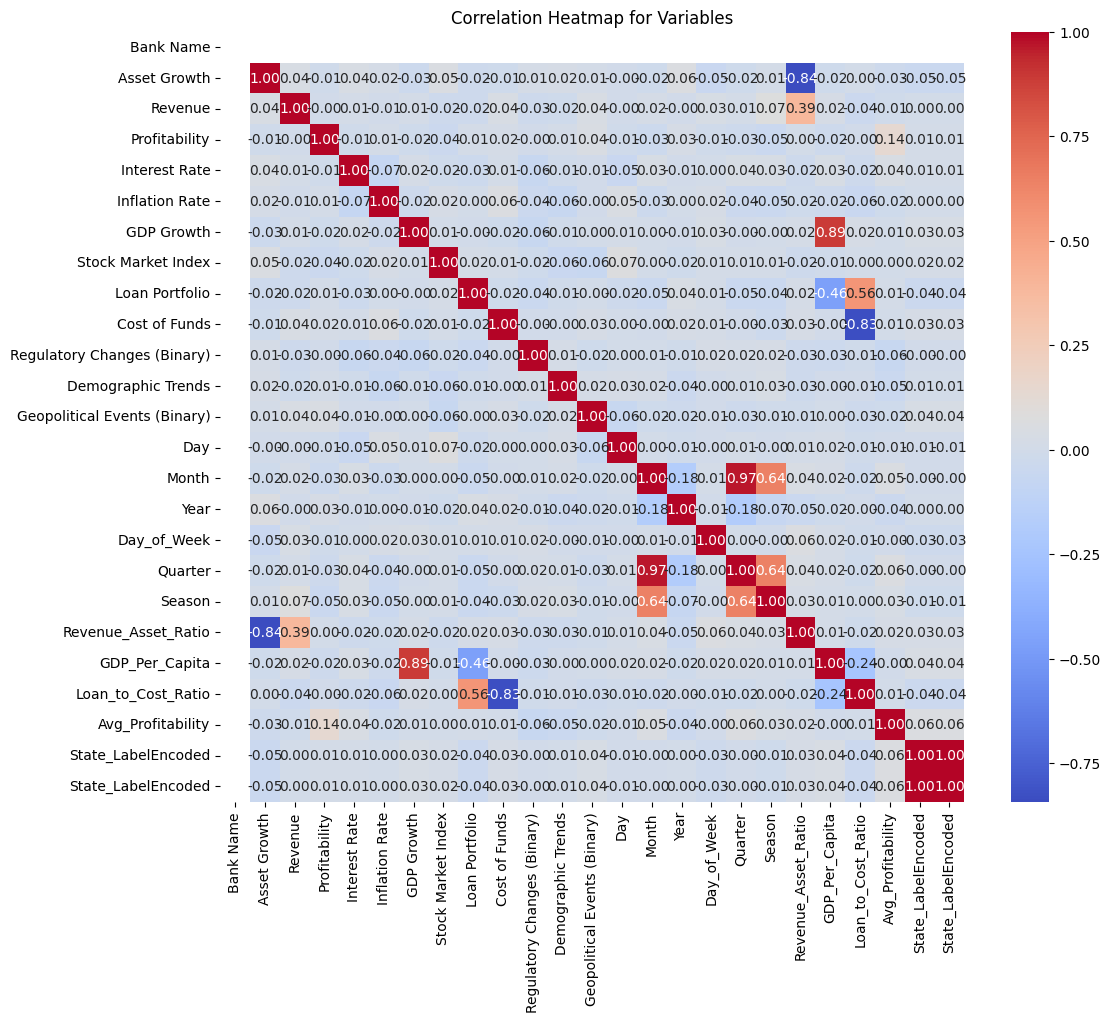

In [91]:
plt.figure(figsize=(12, 10))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Variables')
plt.show()


# Data Split 

In [92]:
# Define the features (X) and target variable (y)
features = df2.drop(['Asset Growth'], axis=1)
targets = df2['Asset Growth']

In [93]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,targets ,test_size=0.3,random_state=42,shuffle=True)

# Feature selection

In [94]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming X_train and y_train are your feature matrix and target variable
best_features = SelectKBest(score_func=f_regression, k='all')
fit = best_features.fit(X_train, y_train)

# Get feature scores and indices
feature_scores =fit.scores_
feature_indices = fit.get_support(indices=True)

# Create a DataFrame with feature names and scores
dfcolumns = pd.DataFrame(X_train.columns)
dfscores = pd.DataFrame(feature_scores)
featurescores = pd.concat([dfcolumns, dfscores], axis=1)
featurescores.columns = ['Specs', 'Score']
# Display feature score
print(featurescores)

                           Specs        Score
0                      Bank Name     0.000000
1                        Revenue     1.938000
2                  Profitability     0.332558
3                  Interest Rate     1.050090
4                 Inflation Rate     0.375846
5                     GDP Growth     1.880928
6             Stock Market Index     2.927468
7                 Loan Portfolio     1.558600
8                  Cost of Funds     0.000003
9    Regulatory Changes (Binary)     0.295163
10            Demographic Trends     2.415201
11  Geopolitical Events (Binary)     0.022897
12                           Day     0.162636
13                         Month     0.001212
14                          Year     1.600640
15                   Day_of_Week     1.136711
16                       Quarter     0.034190
17                        Season     0.380690
18           Revenue_Asset_Ratio  1654.121173
19                GDP_Per_Capita     0.533673
20            Loan_to_Cost_Ratio  

In [95]:
featurescores.isnull().sum()

Specs    0
Score    0
dtype: int64

In [96]:
feature_list=featurescores['Specs'].to_list()
feature_list

['Bank Name',
 'Revenue',
 'Profitability',
 'Interest Rate',
 'Inflation Rate',
 'GDP Growth',
 'Stock Market Index',
 'Loan Portfolio',
 'Cost of Funds',
 'Regulatory Changes (Binary)',
 'Demographic Trends',
 'Geopolitical Events (Binary)',
 'Day',
 'Month',
 'Year',
 'Day_of_Week',
 'Quarter',
 'Season',
 'Revenue_Asset_Ratio',
 'GDP_Per_Capita',
 'Loan_to_Cost_Ratio',
 'Avg_Profitability',
 'State_LabelEncoded',
 'State_LabelEncoded']

In [97]:
import joblib as jb
jb.dump(feature_list,'D:/DS NOTE/My external project/Comprehensive Banking Analytics/regression/featureselected_model.pkl')

['D:/DS NOTE/My external project/Comprehensive Banking Analytics/regression/featureselected_model.pkl']

In [98]:
featuer_selected=X_train[feature_list]
featuer_selected

,Bank Name,Revenue,Profitability,Interest Rate,Inflation Rate,GDP Growth,Stock Market Index,Loan Portfolio,Cost of Funds,Regulatory Changes (Binary),...,Quarter,Season,Revenue_Asset_Ratio,GDP_Per_Capita,Loan_to_Cost_Ratio,Avg_Profitability,State_LabelEncoded,State_LabelEncoded,State_LabelEncoded,State_LabelEncoded
541,1,3934.253231,12.375158,7.093498,3.168673,4.011755,50340.361132,6235.877350,4.814889,1,...,2,3,548.498779,0.000643,1295.123895,15.010526,0,0,0,0
440,1,3120.336367,14.596601,5.721595,4.306189,6.559854,53167.933696,7683.617418,5.243091,1,...,1,2,824.592711,0.000854,1465.474639,14.860606,13,13,13,13
482,1,2918.479755,15.741893,5.759079,3.983652,5.718318,52785.158801,6339.516996,4.285470,1,...,2,2,647.601142,0.000902,1479.304874,14.273667,14,14,14,14
422,1,2499.092400,15.749245,5.461700,4.020013,5.839349,52667.683563,7845.144810,4.372097,1,...,1,1,390.889388,0.000744,1794.366761,15.325650,16,16,16,16
778,1,2284.274248,15.957065,5.554515,4.494999,6.020829,53753.632399,6317.072317,4.873536,0,...,1,1,411.276973,0.000953,1296.199073,14.958654,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,2974.123838,14.481856,6.161968,3.032146,6.735355,48517.098180,6623.406643,3.673879,0,...,2,2,808.213375,0.001017,1802.837389,14.724142,20,20,20,20
270,1,3631.893878,13.442393,5.349075,4.144849,6.879237,54314.903869,7395.980943,4.440592,0,...,3,4,558.773293,0.000930,1665.539235,14.945320,10,10,10,10
860,1,3083.409625,15.166065,7.491868,3.652764,4.063111,45751.429532,6413.674221,3.708965,1,...,2,2,1202.857322,0.000634,1729.235672,15.038876,8,8,8,8
435,1,2694.686653,16.396194,7.658258,3.124492,4.397412,47413.497038,6946.426374,3.707549,0,...,1,2,873.918774,0.000633,1873.589693,14.806075,9,9,9,9


In [99]:
Feature_selection =jb.load('D:/DS NOTE/My external project/Comprehensive Banking Analytics/regression/featureselected_model.pkl')

In [100]:
feature_selected_test=X_test[Feature_selection]
feature_selected_test

,Bank Name,Revenue,Profitability,Interest Rate,Inflation Rate,GDP Growth,Stock Market Index,Loan Portfolio,Cost of Funds,Regulatory Changes (Binary),...,Quarter,Season,Revenue_Asset_Ratio,GDP_Per_Capita,Loan_to_Cost_Ratio,Avg_Profitability,State_LabelEncoded,State_LabelEncoded,State_LabelEncoded,State_LabelEncoded
521,1,2315.909646,17.487292,6.644436,4.712721,4.957676,54590.241760,6777.702993,4.148627,1,...,2,3,317.129937,0.000731,1633.721821,14.819371,15,15,15,15
737,1,2843.656357,16.826968,6.216268,3.428443,5.943160,49427.359277,7715.531097,4.797068,0,...,1,1,1142.131626,0.000770,1608.384660,15.019963,25,25,25,25
740,1,3428.065289,12.398780,7.807812,3.837025,5.528527,50320.868239,7392.442872,5.269350,1,...,1,1,1159.200044,0.000748,1402.913626,14.685447,5,5,5,5
660,1,2069.340533,14.573666,6.187812,4.262210,4.284548,54055.821376,7354.683692,4.890977,0,...,4,4,310.731335,0.000583,1503.724883,15.114352,4,4,4,4
411,1,3220.450299,15.316242,7.257405,4.024923,5.378689,47399.489037,6548.023561,4.180770,0,...,1,1,886.475313,0.000821,1566.224420,15.325650,16,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,1,2163.450691,13.585658,5.604585,4.557938,6.808489,49870.825443,6277.305058,4.533472,0,...,2,2,1016.842428,0.001085,1384.657264,15.019963,25,25,25,25
935,1,2038.232189,12.510621,6.564131,5.423872,6.535990,47852.443423,7911.837600,4.438870,0,...,3,3,346.352546,0.000826,1782.399145,15.351610,7,7,7,7
428,1,2975.142387,12.311015,5.170041,4.291040,4.759597,47082.318086,6079.422415,4.659073,1,...,1,2,602.676468,0.000783,1304.856729,15.108692,19,19,19,19
7,1,2856.399230,13.451590,5.378006,5.015127,6.785667,46910.621393,7043.724591,4.526154,1,...,1,1,1031.833613,0.000963,1556.227188,15.019963,25,25,25,25


In [101]:
# Assuming you have a DataFrame with selected features
feature_selected = X_train.iloc[:, feature_indices]
feature_selected_test = X_test.iloc[:, feature_indices]


# Model Training 

**LinearRegression**

In [102]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(feature_selected, y_train)
print('Train score',linear_reg_model.score(feature_selected, y_train)*100)
print('Test score',linear_reg_model.score(feature_selected_test, y_test)*100)


Train score 86.82623521185498
Test score 85.69893051643209


**AdaBoostRegressor**

In [103]:
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(feature_selected, y_train)
print('Train score',adaboost_model.score(feature_selected, y_train)*100)
print('Test score',adaboost_model.score(feature_selected_test, y_test)*100)

Train score 96.04499756846464
Test score 95.18973827375982


In [111]:
import joblib as jb
jb.dump(adaboost_model,'D:/DS NOTE/My external project/Comprehensive Banking Analytics/regression/adaboost_model.pkl')

['D:/DS NOTE/My external project/Comprehensive Banking Analytics/regression/adaboost_model.pkl']

**RandomForestRegressor**

In [110]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=52)
rf.fit(feature_selected, y_train)
print('Train score',rf.score(feature_selected, y_train)*100)
print('Test score',rf.score(feature_selected_test, y_test)*100)

Train score 99.8732115609294
Test score 99.10573869811351


# prediction

In [112]:
Model=jb.load('D:/DS NOTE/My external project/Comprehensive Banking Analytics/regression/adaboost_model.pkl')

In [113]:
y_pred=pd.DataFrame(Model.predict(X_test))
y_pred

,0
0,7.132938
1,2.628703
2,3.022318
3,7.067426
4,3.618134
...,...
295,2.628703
296,6.561433
297,5.108803
298,2.721531


# Evaluation of Metrics

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)

# Calculate Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2_score)
R2 = r2_score(y_test, y_pred)
print(f'MSE= {MSE}\nRMSE = {RMSE}\nMAE = {MAE}\nR2 = {R2}')

MSE= 0.15034254402157582
RMSE = 0.38774030487115446
MAE = 0.3160025273372701
R2 = 0.9518973827375982


# conculsion
- The regression models developed for predicting key performance indicators (KPIs) in the banking institution demonstrated strong performance, as indicated by low Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) values. The high R-squared (R2) value of 0.95 indicates that the models explain a significant portion of the variance in the KPIs. These results suggest that the models effectively capture the impact of various factors, providing actionable insights for optimizing resource allocation, investment strategies, and overall business performance.